In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing, make_moons
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.ensemble import BaggingClassifier

In [22]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
import utils

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

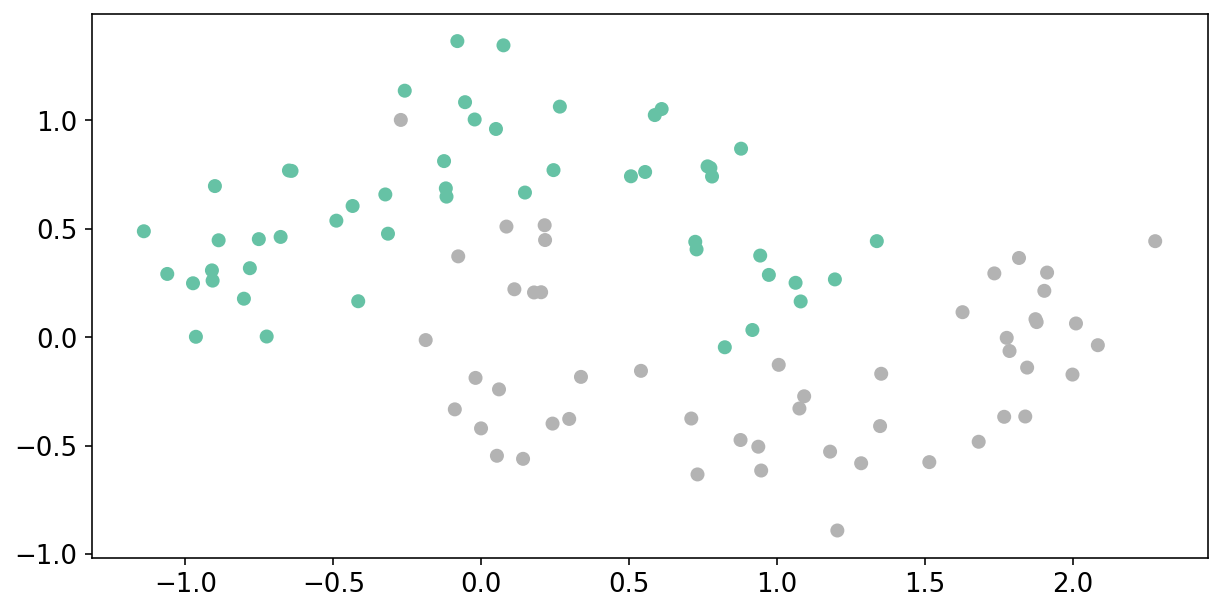

In [20]:
X, y = make_moons(100, noise=0.2, random_state=2718)
X_test, y_test = make_moons(40, noise=0.2, random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2");

In [15]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=30, include_bias=False)),
    ('logistic', LogisticRegression(penalty="none"))
])

bagging_logreg = BaggingClassifier(model, n_estimators=100, random_state=314,
                                  bootstrap=True, max_samples=100, n_jobs=-1)

In [17]:
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('logistic',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                         

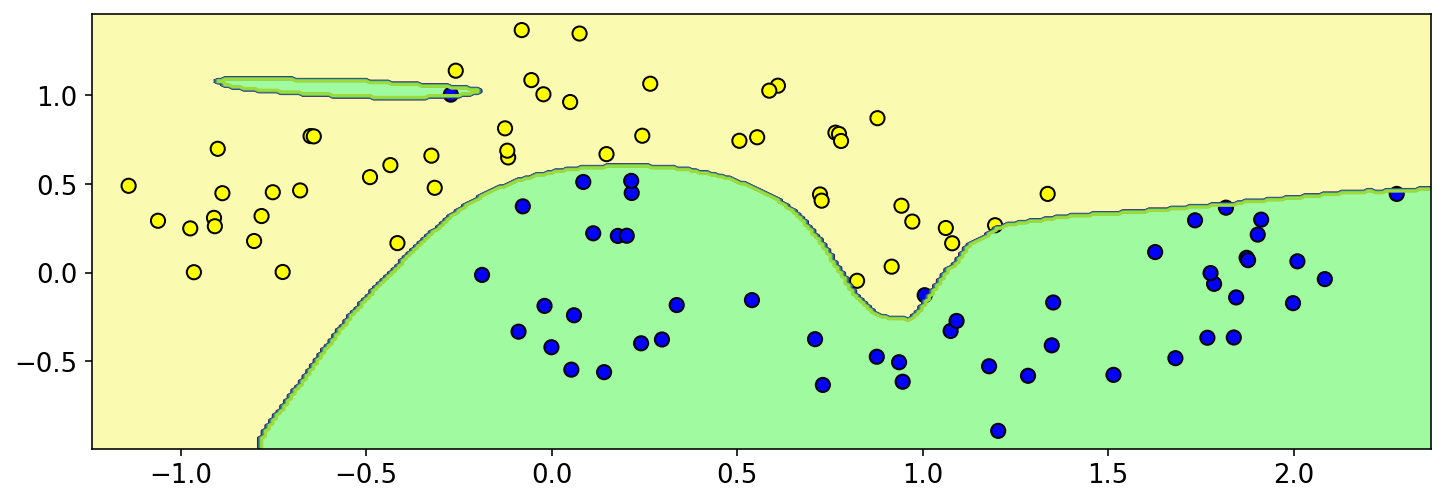

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

utils.plot_classf_model(X, y, bagging_logreg, ax=ax, contour=True)

In [30]:
yhat_test = bagging_logreg.predict(X_test)
f1_score(y_test, yhat_test)

0.8947368421052632